In [169]:
import sys
sys.path.insert(0, '../scripts')
sys.path.insert(0, '../data/database')
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

engine =  create_engine('sqlite:///../data/database/happycows.db')

In [175]:
with engine.connect() as con:
    milk_volumes = pd.read_sql_table('milk_volume', con)
    weather = pd.read_sql_table('weather', con)

   index      STATION                 NAME  LATITUDE  LONGITUDE  ELEVATION  \
0      0  USC00361354  CHAMBERSBURG, PA US   39.9353   -77.6394      195.1   
1      1  USC00361354  CHAMBERSBURG, PA US   39.9353   -77.6394      195.1   
2      2  USC00361354  CHAMBERSBURG, PA US   39.9353   -77.6394      195.1   
3      3  USC00361354  CHAMBERSBURG, PA US   39.9353   -77.6394      195.1   
4      4  USC00361354  CHAMBERSBURG, PA US   39.9353   -77.6394      195.1   

        DATE  PRCP  TMIN  TMAX  
0 2014-01-01  0.00  20.0  36.0  
1 2014-01-02  0.16  21.0  38.0  
2 2014-01-03  0.00   8.0  38.0  
3 2014-01-04  0.00   6.0  28.0  
4 2014-01-05  0.35  11.0  33.0  


In [190]:
median_milk_production = milk_volumes['milk_weight'].groupby(milk_volumes['date'].dt.week).median()

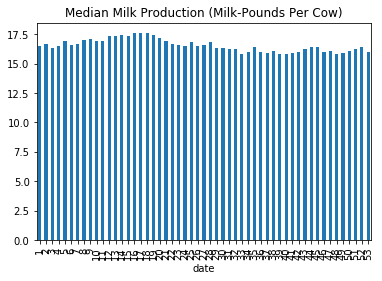

In [192]:
median_milk_production.plot.bar()
plt.title("Median Milk Production (Milk-Pounds Per Cow)")
plt.show()

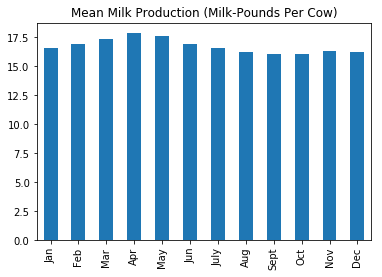

In [193]:
mean_milk_production.plot.bar()
plt.title("Mean Milk Production (Milk-Pounds Per Cow)")
plt.xlabel(s="")
plt.xticks( range(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec') )
plt.show()

In [194]:
median_temps_extremes = weather[['TMIN','TMAX']].groupby(weather['DATE'].dt.week).median()

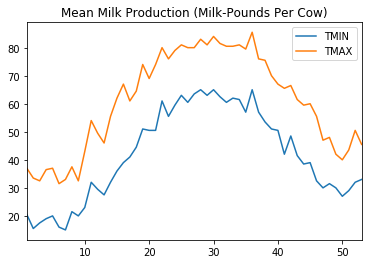

In [195]:
median_temps_extremes.plot(kind='line')
plt.title("Mean Milk Production (Milk-Pounds Per Cow)")
plt.xlabel(s="")
#plt.xticks( range(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'))
plt.show()